In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
! ls

gdrive	sample_data


In [4]:
! git clone https://github.com/Rohithmarktricks/ERAv1_Session5.git

Cloning into 'ERAv1_Session5'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 0), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 79.15 KiB | 1.46 MiB/s, done.


In [6]:
%cd ERAv1_Session5

/content/ERAv1_Session5


In [7]:
!ls

model.py  __pycache__  README.md  S5.ipynb  utils.py


## Import the required files

In [8]:
from model import *
from utils import *

In [9]:
device = get_device()
print(device)

cuda


In [10]:
train_transforms = get_transforms(train=True)
test_transforms = get_transforms(train=False)

print(train_transforms, test_transforms)

Compose(
    RandomApply(
    p=0.1
    CenterCrop(size=(22, 22))
)
    Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
    RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=(0.1307,), std=(0.3081,))
) Compose(
    ToTensor()
    Normalize(mean=(0.1307,), std=(0.3081,))
)


In [11]:
train_data = get_mnist_data(train=True, transforms=train_transforms)
test_data = get_mnist_data(train=False, transforms=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 91279897.35it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30784166.16it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25208003.55it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6043949.48it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [12]:
hyperparams = get_hyperparams(512)
print(hyperparams)

{'batch_size': 512, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}


In [13]:
train_loader = get_dataloader(train_data, hyper_params=hyperparams)
test_loader = get_dataloader(test_data, hyper_params=hyperparams)

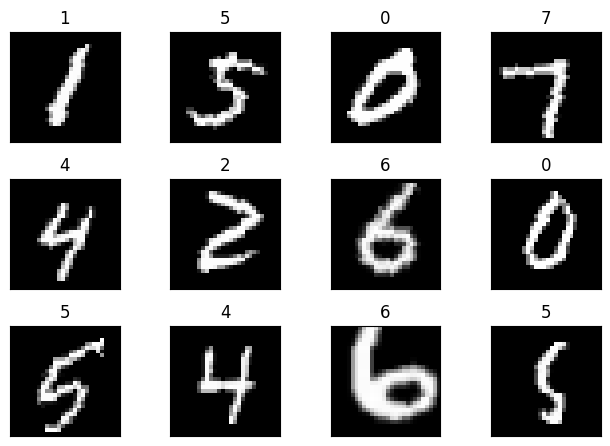

In [14]:
plot_sample(train_loader)

In [15]:
model = Net().to(device=device)

In [16]:
loss = get_loss()
optimizer, scheduler = get_optimizer(model, lr=0.01, momentum=0.9)

Adjusting learning rate of group 0 to 1.0000e-02.


In [17]:
trainer = Trainer(model=model)

In [18]:
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f"Epoch {epoch}")
    trainer.train(device, train_loader=train_loader,
                        criterion=loss, optimizer=optimizer, epoch=epoch)
    trainer.test(device, test_loader, loss)
    scheduler.step()

Epoch 1


Train: Loss=1.5385 Batch_id=117 Accuracy=27.23: 100%|██████████| 118/118 [00:31<00:00,  3.80it/s]



Test set: Average loss: 0.0025, Accuracy: 6540/10000 (65.40%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1486 Batch_id=117 Accuracy=86.13: 100%|██████████| 118/118 [00:25<00:00,  4.72it/s]



Test set: Average loss: 0.0003, Accuracy: 9573/10000 (95.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1929 Batch_id=117 Accuracy=94.81: 100%|██████████| 118/118 [00:25<00:00,  4.65it/s]



Test set: Average loss: 0.0002, Accuracy: 9681/10000 (96.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1942 Batch_id=117 Accuracy=96.37: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]



Test set: Average loss: 0.0001, Accuracy: 9806/10000 (98.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1120 Batch_id=117 Accuracy=96.95: 100%|██████████| 118/118 [00:24<00:00,  4.87it/s]



Test set: Average loss: 0.0001, Accuracy: 9821/10000 (98.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.2108 Batch_id=117 Accuracy=97.40: 100%|██████████| 118/118 [00:23<00:00,  5.03it/s]



Test set: Average loss: 0.0001, Accuracy: 9841/10000 (98.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0134 Batch_id=117 Accuracy=97.74: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]



Test set: Average loss: 0.0001, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0215 Batch_id=117 Accuracy=97.89: 100%|██████████| 118/118 [00:24<00:00,  4.84it/s]



Test set: Average loss: 0.0001, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0772 Batch_id=117 Accuracy=98.15: 100%|██████████| 118/118 [00:24<00:00,  4.81it/s]



Test set: Average loss: 0.0001, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0503 Batch_id=117 Accuracy=98.22: 100%|██████████| 118/118 [00:24<00:00,  4.73it/s]



Test set: Average loss: 0.0001, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0429 Batch_id=117 Accuracy=98.40: 100%|██████████| 118/118 [00:24<00:00,  4.84it/s]



Test set: Average loss: 0.0001, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0123 Batch_id=117 Accuracy=98.46: 100%|██████████| 118/118 [00:22<00:00,  5.19it/s]



Test set: Average loss: 0.0001, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0233 Batch_id=117 Accuracy=98.52: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]



Test set: Average loss: 0.0001, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0221 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]



Test set: Average loss: 0.0001, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0050 Batch_id=117 Accuracy=98.70: 100%|██████████| 118/118 [00:25<00:00,  4.64it/s]



Test set: Average loss: 0.0000, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.1107 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:25<00:00,  4.70it/s]



Test set: Average loss: 0.0000, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0307 Batch_id=117 Accuracy=99.04: 100%|██████████| 118/118 [00:24<00:00,  4.89it/s]



Test set: Average loss: 0.0000, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0351 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]



Test set: Average loss: 0.0000, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0324 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]



Test set: Average loss: 0.0000, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0293 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:23<00:00,  5.06it/s]



Test set: Average loss: 0.0000, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.


In [19]:
train_loss, train_acc, test_loss, test_acc = trainer.get_stats()

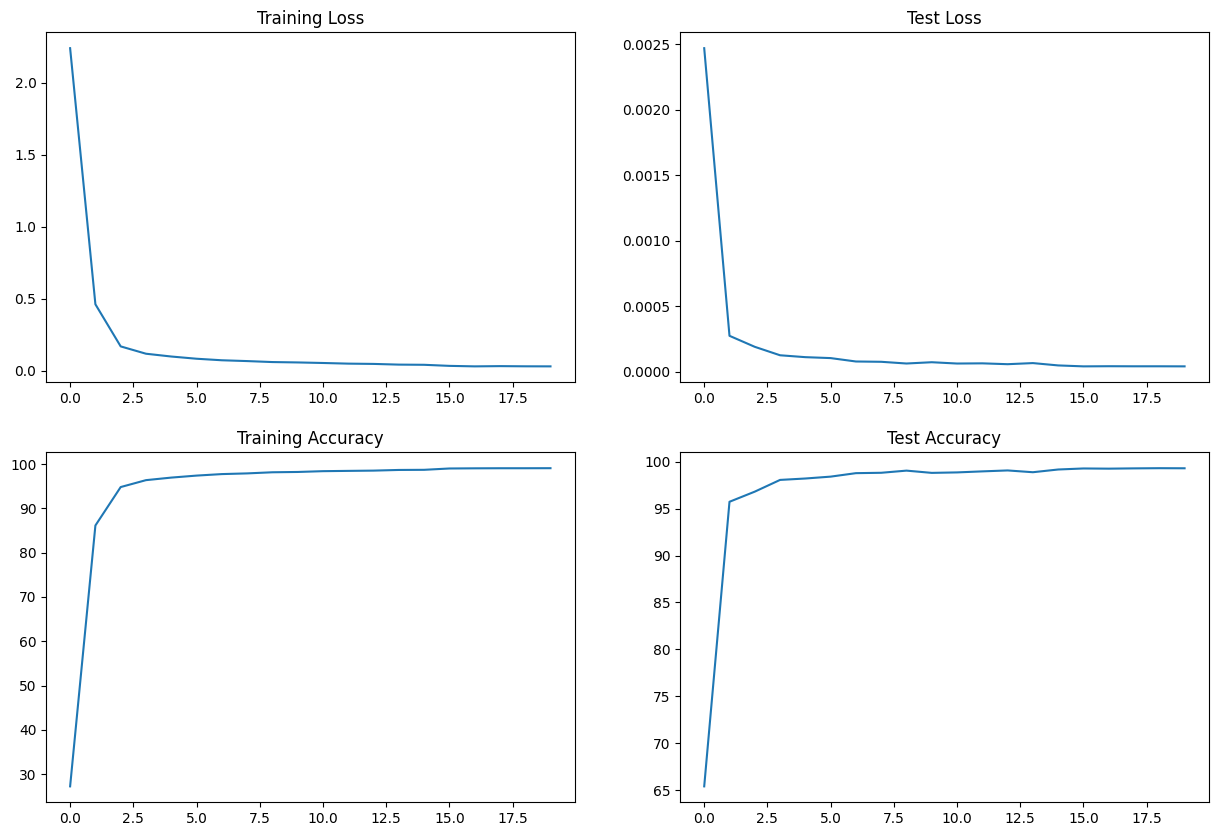

In [20]:
trainer.plot_metrics()